In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df_cultura = pd.read_csv('data/aggregated_cpm.csv', index_col=[0])
df_cultura

,region_name,decade,N_est,score
0,Arabic world,-610,5.529170,1
1,Arabic world,-400,2.611448,1
2,Arabic world,-360,14.825990,3
3,Arabic world,-330,6.061846,1
4,Arabic world,-310,6.022250,1
...,...,...,...,...
2393,United Kingdom,1840,12298.471136,936
2394,United Kingdom,1850,12344.101231,909
2395,United Kingdom,1860,15480.038693,1144
2396,United Kingdom,1870,11764.644742,912


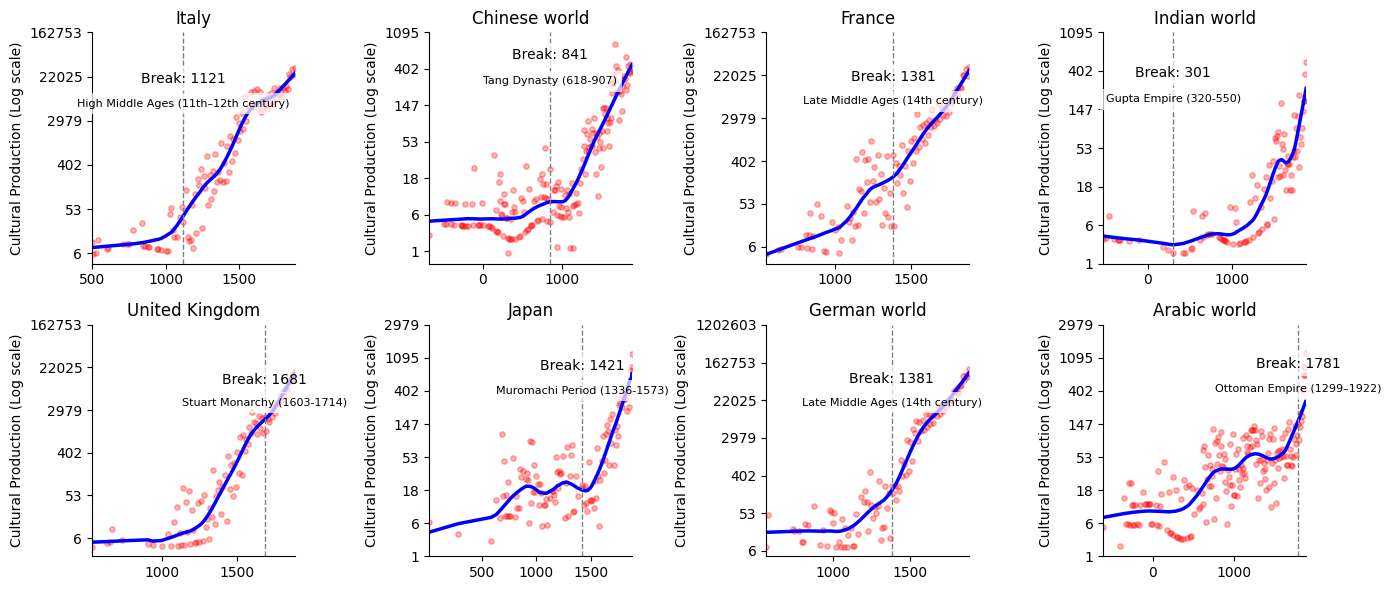

In [25]:

historical_periods = {
    "Arabic world": "Ottoman Empire (1299–1922)",  # falls within the classical period before major reforms
    "Chinese world":"Tang Dynasty (618-907)",      # the peak cultural phase of the Tang Dynasty
    "France": "Late Middle Ages (14th century)",         # time of the Hundred Years' War and societal upheaval
    "German world": "Late Middle Ages (14th century)",   # fragmented Holy Roman Empire, pre-Reformation
    "Indian world": "Gupta Empire (320-550)",  # end of classical golden age
    "Italy": "High Middle Ages (11th–12th century)",     # Scholasticism, rise of universities
    "Japan": "Muromachi Period (1336-1573)",  # internal division and shogunate rule
    "United Kingdom": "Stuart Monarchy (1603-1714)",  # beginning of constitutional monarchy and Royal Society
}

# Function to plot the citation trends with LOWESS smoothing and log scale
def plot_citation_trends_lowess(df, regions, trend_breaks, historical_periods, figsize=(14, 6)):
    # Set up the figure with subplots (2 rows x 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()
    
    # Plot each region
    for i, region in enumerate(regions):
        # Filter data for this region
        region_data = df[df['region_name'] == region].copy()
        
        if len(region_data) == 0:
            # Skip if there's no data for this region
            axes[i].set_title(f"{region} (No Data)")
            continue
        
        # Use decade as year and sort by decade
        region_data = region_data.sort_values('decade')
        
        # Get the trend break year for this region
        break_year = trend_breaks.get(region, None)
        historical_period = historical_periods.get(region, "")
        
        # Plot with log scale for y-axis
        ax = axes[i]
        
        # Add small constant to handle zeros in log scale
        epsilon = 0.1
        region_data['log_N_est'] = np.log1p(region_data['N_est'] + epsilon)
        
        # Show original data points as faded background
        ax.scatter(region_data['decade'], region_data['log_N_est'], 
                  color='red', s=15, alpha=0.3)
        
        # Apply LOWESS smoothing
        # Adjust frac parameter for smoothness (0.1-0.3 for less smoothing, 0.5-0.8 for more smoothing)
        lowess_fraction = 0.3
        
        # Only apply LOWESS if we have enough data points
        if len(region_data) > 5:
            # Compute LOWESS
            lowess_result = lowess(
                region_data['log_N_est'], 
                region_data['decade'],
                frac=lowess_fraction,
                return_sorted=True
            )
            
            # Plot the smoothed line
            ax.plot(lowess_result[:, 0], lowess_result[:, 1], 
                   color='blue', linewidth=2.5, label='LOWESS Trend')
        else:
            # If not enough points, just use the regular line
            ax.plot(region_data['decade'], region_data['log_N_est'], 
                   color='blue', linewidth=2.5, label='Trend')
        
        # Add vertical line for the trend break
        if break_year:
            ax.axvline(x=break_year, color='gray', linestyle='--', linewidth=1)
            
            # Position text for the break year
            y_pos = ax.get_ylim()[1] * 0.9
            ax.text(break_year, y_pos, f'Break: {break_year}', 
                   horizontalalignment='center', backgroundcolor='white', 
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
            
            # Add historical period text below
            y_pos_period = ax.get_ylim()[1] * 0.8
            ax.text(break_year, y_pos_period, historical_period,
                  horizontalalignment='center', fontsize=8, 
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # Set title and labels
        ax.set_title(region)
        ax.set_xlabel('')
        ax.set_ylabel('Cultural Production (Log scale)')
        
        # Set custom y-tick labels to show original values rather than log values
        yticks = ax.get_yticks()
        yticklabels = [f"{int(np.expm1(y) - epsilon)}" for y in yticks if y > 0]
        ytick_positions = [y for y in yticks if y > 0]
        ax.set_yticks(ytick_positions)
        ax.set_yticklabels(yticklabels)
        
        # Format the plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Set x-axis limits to show full historical range
        min_year = min(region_data['decade'])
        max_year = max(region_data['decade'])
        ax.set_xlim(min_year, max_year)
        
    plt.tight_layout()
    return fig

# Regions from your images
regions = [
    "Italy", "Chinese world", "France", "Indian world", 
    "United Kingdom", "Japan", "German world", "Arabic world"
]

# Standardize region names to match your data
regions_standardized = []
for region in regions:
    if " World" in region:
        regions_standardized.append(region.replace(" World", " world"))
    else:
        regions_standardized.append(region)

# Trend break years from the table in Image 3
trend_breaks = {
    "Arabic world": 1781,
    "Chinese world": 841,
    "France": 1381,
    "German world": 1381,
    "Indian world": 301,
    "Italy": 1121,
    "Japan": 1421,
    "United Kingdom": 1681
}

# Plot using LOWESS smoothing
fig = plot_citation_trends_lowess(df_cultura, regions_standardized, trend_breaks, historical_periods)

# Show the plot
plt.show()

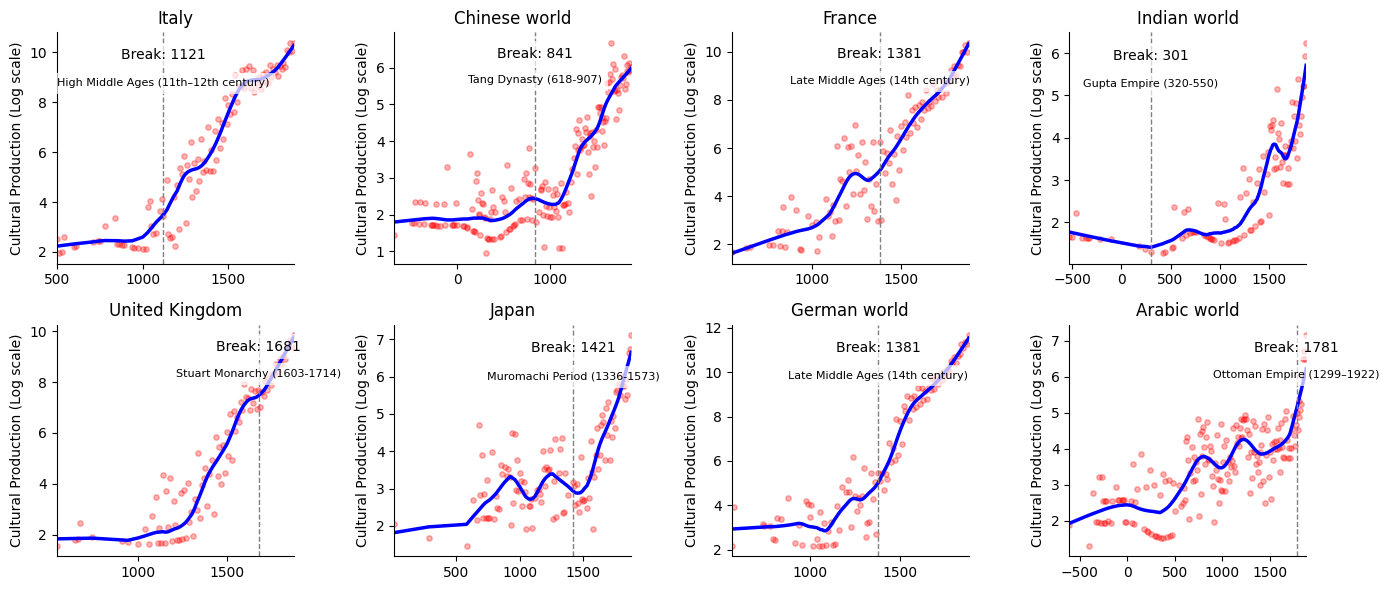

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df_cultura = pd.read_csv('data/aggregated_cpm.csv', index_col=[0])

historical_periods = {
    "Arabic world": "Ottoman Empire (1299–1922)",  # falls within the classical period before major reforms
    "Chinese world":"Tang Dynasty (618-907)",      # the peak cultural phase of the Tang Dynasty
    "France": "Late Middle Ages (14th century)",         # time of the Hundred Years' War and societal upheaval
    "German world": "Late Middle Ages (14th century)",   # fragmented Holy Roman Empire, pre-Reformation
    "Indian world": "Gupta Empire (320-550)",  # end of classical golden age
    "Italy": "High Middle Ages (11th–12th century)",     # Scholasticism, rise of universities
    "Japan": "Muromachi Period (1336-1573)",  # internal division and shogunate rule
    "United Kingdom": "Stuart Monarchy (1603-1714)",  # beginning of constitutional monarchy and Royal Society
}

# Function to plot the citation trends with LOWESS smoothing and log scale
def plot_citation_trends_lowess(df, regions, trend_breaks, historical_periods, figsize=(14, 6)):
    # Set up the figure with subplots (2 rows x 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()
    
    # Plot each region
    for i, region in enumerate(regions):
        # Filter data for this region
        region_data = df[df['region_name'] == region].copy()
        
        if len(region_data) == 0:
            # Skip if there's no data for this region
            axes[i].set_title(f"{region} (No Data)")
            continue
        
        # Use decade as year and sort by decade
        region_data = region_data.sort_values('decade')
        
        # Get the trend break year for this region
        break_year = trend_breaks.get(region, None)
        historical_period = historical_periods.get(region, "")
        
        # Plot with log scale for y-axis
        ax = axes[i]
        
        # Add small constant to handle zeros in log scale
        epsilon = 0.1
        region_data['log_N_est'] = np.log1p(region_data['N_est'] + epsilon)
        
        # Show original data points as faded background
        ax.scatter(region_data['decade'], region_data['log_N_est'], 
                  color='red', s=15, alpha=0.3)
        
        # Apply LOWESS smoothing
        # Adjust frac parameter for smoothness (0.1-0.3 for less smoothing, 0.5-0.8 for more smoothing)
        lowess_fraction = 0.2
        
        # Only apply LOWESS if we have enough data points
        if len(region_data) > 5:
            # Compute LOWESS
            lowess_result = lowess(
                region_data['log_N_est'], 
                region_data['decade'],
                frac=lowess_fraction,
                return_sorted=True
            )
            
            # Plot the smoothed line
            ax.plot(lowess_result[:, 0], lowess_result[:, 1], 
                   color='blue', linewidth=2.5, label='LOWESS Trend')
        else:
            # If not enough points, just use the regular line
            ax.plot(region_data['decade'], region_data['log_N_est'], 
                   color='blue', linewidth=2.5, label='Trend')
        
        # Add vertical line for the trend break
        if break_year:
            ax.axvline(x=break_year, color='gray', linestyle='--', linewidth=1)
            
            # Position text for the break year
            y_pos = ax.get_ylim()[1] * 0.9
            ax.text(break_year, y_pos, f'Break: {break_year}', 
                   horizontalalignment='center', backgroundcolor='white', 
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
            
            # Add historical period text below
            y_pos_period = ax.get_ylim()[1] * 0.8
            ax.text(break_year, y_pos_period, historical_period,
                  horizontalalignment='center', fontsize=8, 
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # Set title and labels
        ax.set_title(region)
        ax.set_xlabel('')
        ax.set_ylabel('Cultural Production (Log scale)')
        
        # Keep the log scale values on y-axis instead of converting back
        # No custom y-tick formatting needed - display actual log values
        
        # Format the plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Set x-axis limits to show full historical range
        min_year = min(region_data['decade'])
        max_year = max(region_data['decade'])
        ax.set_xlim(min_year, max_year)
        
    plt.tight_layout()
    return fig

# Regions from your images
regions = [
    "Italy", "Chinese world", "France", "Indian world", 
    "United Kingdom", "Japan", "German world", "Arabic world"
]

# Standardize region names to match your data
regions_standardized = []
for region in regions:
    if " World" in region:
        regions_standardized.append(region.replace(" World", " world"))
    else:
        regions_standardized.append(region)

# Trend break years from the table in Image 3
trend_breaks = {
    "Arabic world": 1781,
    "Chinese world": 841,
    "France": 1381,
    "German world": 1381,
    "Indian world": 301,
    "Italy": 1121,
    "Japan": 1421,
    "United Kingdom": 1681
}

# Plot using LOWESS smoothing
fig = plot_citation_trends_lowess(df_cultura, regions_standardized, trend_breaks, historical_periods)

# Show the plot
plt.show()